In [55]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

print(df)

  product  total_qty    revenue
0  Laptop         22  1644000.0
1   Phone         28   688000.0
2  Tablet         14   422000.0


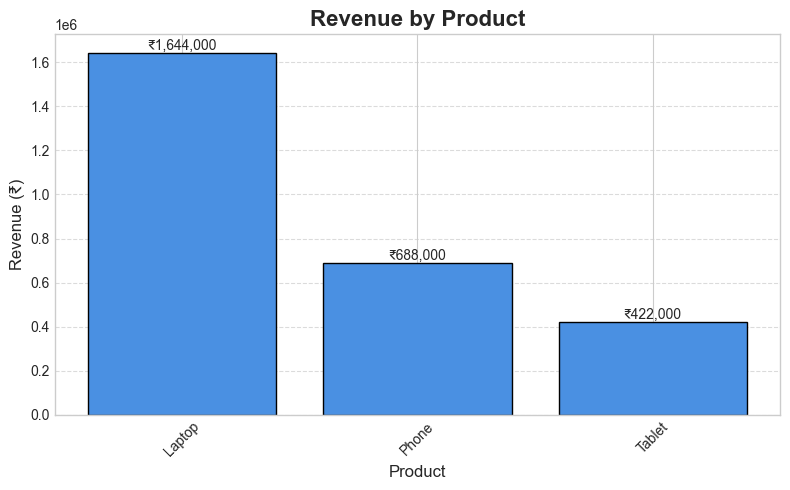

<Figure size 640x480 with 0 Axes>

In [60]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(8,5))
bars = plt.bar(df["product"], df["revenue"], color="#4A90E2", edgecolor="black")
plt.title("Revenue by Product", fontsize=16, fontweight="bold")
plt.xlabel("Product", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"₹{bar.get_height():,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

In [61]:
plt.savefig("filename.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [50]:
df

,product,total_qty,revenue
0,Laptop,11,822000.0
1,Phone,14,344000.0
2,Tablet,7,211000.0


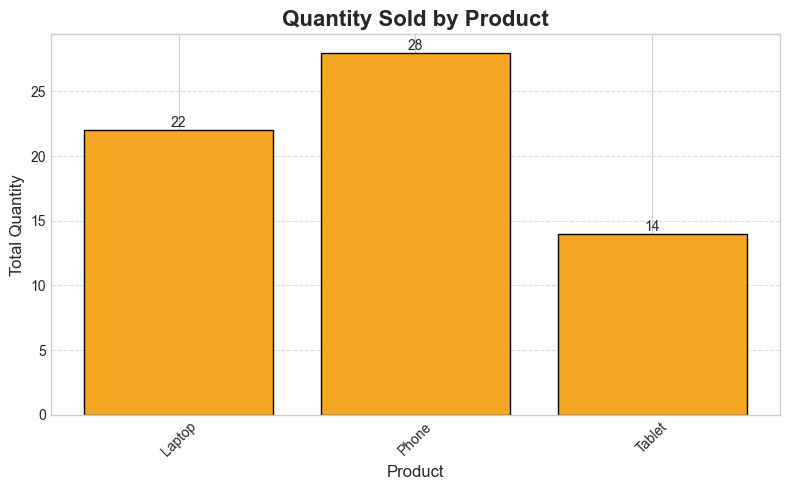

In [57]:
plt.figure(figsize=(8,5))
bars = plt.bar(df["product"], df["total_qty"], color="#F5A623", edgecolor="black")
plt.title("Quantity Sold by Product", fontsize=16, fontweight="bold")
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Quantity", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{bar.get_height():,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

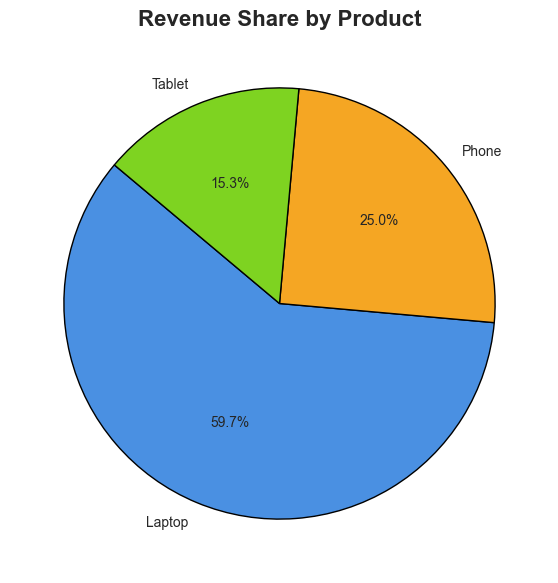

In [58]:
plt.figure(figsize=(7,7))
colors = ["#4A90E2", "#F5A623", "#7ED321", "#D0021B", "#50E3C2"]
plt.pie(df["revenue"], labels=df["product"], autopct="%1.1f%%", startangle=140,
        colors=colors, textprops={"fontsize": 10}, wedgeprops={"edgecolor":"black"})
plt.title("Revenue Share by Product", fontsize=16, fontweight="bold")
plt.show()

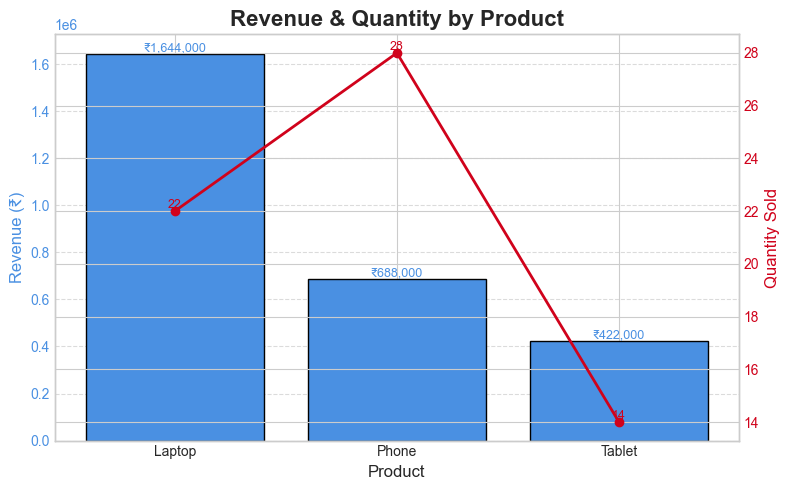

In [59]:
fig, ax1 = plt.subplots(figsize=(8,5))

bars = ax1.bar(df["product"], df["revenue"], color="#4A90E2", edgecolor="black", label="Revenue (₹)")
ax1.set_xlabel("Product", fontsize=12)
ax1.set_ylabel("Revenue (₹)", color="#4A90E2", fontsize=12)
ax1.tick_params(axis="y", labelcolor="#4A90E2")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"₹{bar.get_height():,.0f}", ha="center", va="bottom", fontsize=9, color="#4A90E2")

ax2 = ax1.twinx()
ax2.plot(df["product"], df["total_qty"], color="#D0021B", marker="o", linewidth=2, label="Quantity Sold")
ax2.set_ylabel("Quantity Sold", color="#D0021B", fontsize=12)
ax2.tick_params(axis="y", labelcolor="#D0021B")

for x, y in zip(df["product"], df["total_qty"]):
    ax2.text(x, y, f"{y}", ha="center", va="bottom", fontsize=9, color="#D0021B")

plt.title("Revenue & Quantity by Product", fontsize=16, fontweight="bold")
fig.tight_layout()
plt.show()